In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv", encoding="ISO-8859-1", on_bad_lines="skip")

In [3]:
df.shape

(6899, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0.0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0.0


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    1
dtype: int64

In [8]:
df.duplicated().sum()

0

is_duplicate
0.0    4301
1.0    2597
Name: count, dtype: int64
is_duplicate
0.0    62.351406
1.0    37.648594
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

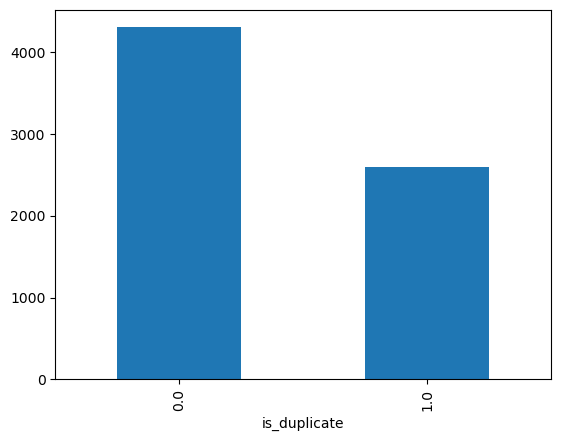

In [11]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [13]:
# Repeated questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 13501
Number of questions getting repeated 281


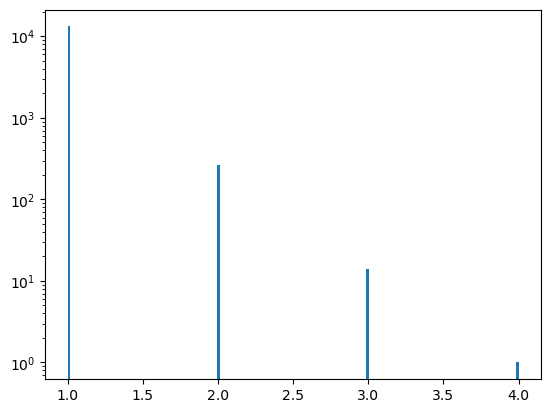

In [14]:
# Repeated questions histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [15]:
# Feature Engineering
df['q1_len'] = df['question1'].str.len() 
df['q2_len'] =df['question2'].str.len()

In [16]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.0,66,57
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.0,51,88
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.0,73,59
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0.0,50,65
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0.0,76,39


In [17]:
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.0,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.0,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.0,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0.0,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0.0,76,39,13,7


In [18]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [19]:
df['word_common'] = df.apply(common_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.0,66,57,14,12,10
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.0,51,88,8,13,4
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.0,73,59,14,10,4
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0.0,50,65,11,9,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0.0,76,39,13,7,2


In [20]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [21]:
df['word_total'] = df.apply(total_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.0,66,57,14,12,10,23
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.0,51,88,8,13,4,20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.0,73,59,14,10,4,24
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0.0,50,65,11,9,0,19
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0.0,76,39,13,7,2,20


In [22]:
df['word_share'] = round(df['word_common']/df['word_total'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.0,66,57,14,12,10,23,0.43
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.0,51,88,8,13,4,20,0.20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.0,73,59,14,10,4,24,0.17
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0.0,50,65,11,9,0,19,0.00
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0.0,76,39,13,7,2,20,0.10


minimum characters 1
maximum characters 370
average num of characters 59


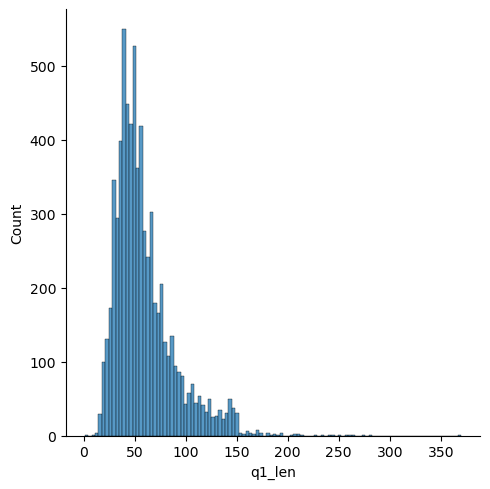

In [24]:
# Analysis of features
sns.displot(df['q1_len'])
print('minimum characters',df['q1_len'].min())
print('maximum characters',df['q1_len'].max())
print('average num of characters',int(df['q1_len'].mean()))

minimum characters 11
maximum characters 1169
average num of characters 60


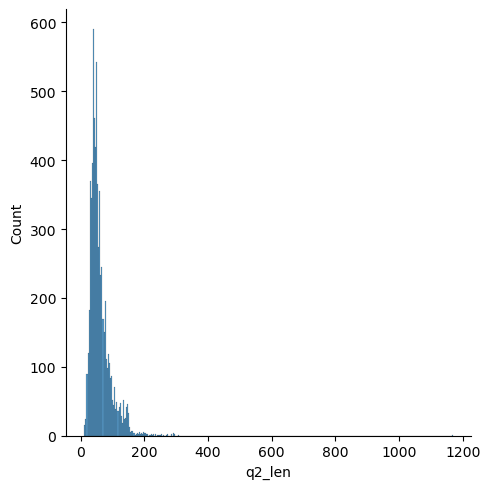

In [26]:
sns.displot(df['q2_len'])
print('minimum characters',df['q2_len'].min())
print('maximum characters',df['q2_len'].max())
print('average num of characters',int(df['q2_len'].mean()))

minimum words 1
maximum words 66
average num of words 10


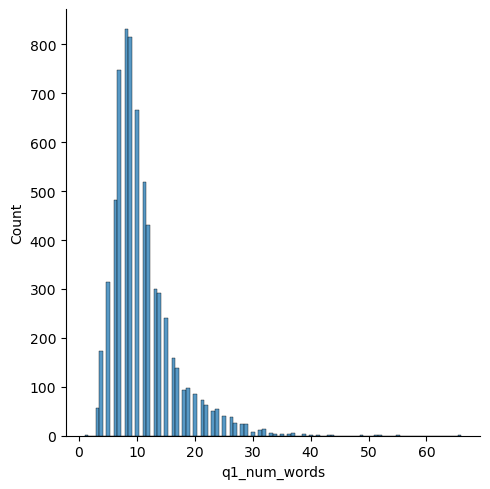

In [27]:
sns.displot(df['q1_num_words'])
print('minimum words',df['q1_num_words'].min())
print('maximum words',df['q1_num_words'].max())
print('average num of words',int(df['q1_num_words'].mean()))

minimum words 2
maximum words 228
average num of words 11


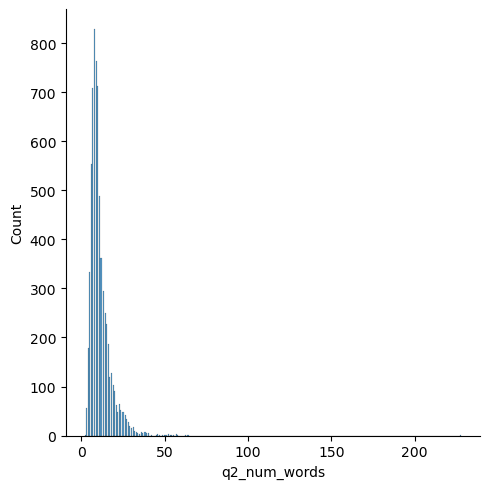

In [28]:
sns.displot(df['q2_num_words'])
print('minimum words',df['q2_num_words'].min())
print('maximum words',df['q2_num_words'].max())
print('average num of words',int(df['q2_num_words'].mean()))

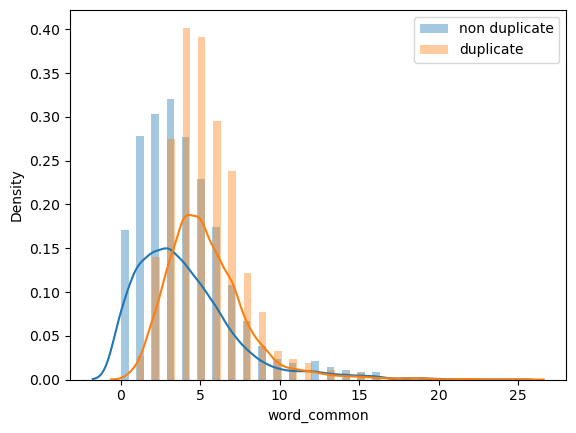

In [29]:
# common words
sns.distplot(df[df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

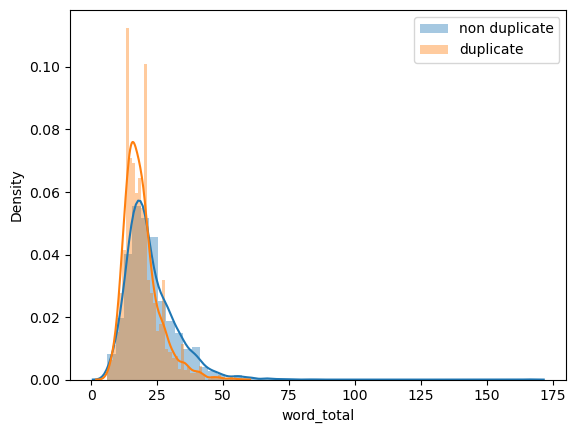

In [30]:
# total words
sns.distplot(df[df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

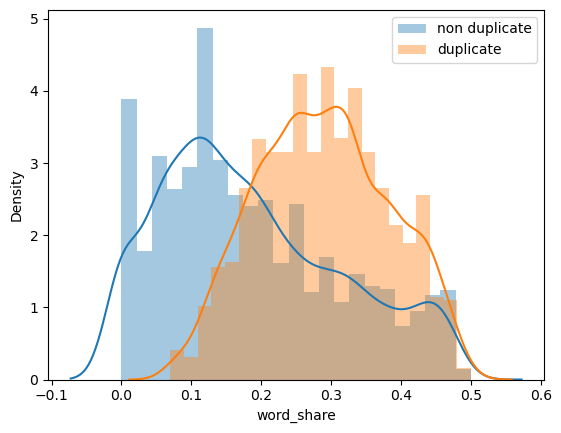

In [31]:
# word share
sns.distplot(df[df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [32]:
ques_df = df[['question1','question2']]
ques_df.head()

,question1,question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [33]:
final_df = df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(6899, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0.0,66,57,14,12,10,23,0.43
1,0.0,51,88,8,13,4,20,0.20
2,0.0,73,59,14,10,4,24,0.17
3,0.0,50,65,11,9,0,19,0.00
4,0.0,76,39,13,7,2,20,0.10


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [35]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(6899, 6000)

In [36]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(6899, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0.0,66,57,14,12,10,23,0.43,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,51,88,8,13,4,20,0.20,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,73,59,14,10,4,24,0.17,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,50,65,11,9,0,19,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,76,39,13,7,2,20,0.10,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [39]:
print("NaN values in y_train:", np.isnan(y_train).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

NaN values in y_train: 1
NaN values in y_test: 0


In [40]:
valid_indices = ~np.isnan(y_train)  # Get indices of non-NaN values
X_train = X_train[valid_indices]
y_train = y_train[valid_indices]

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7297101449275363

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7166666666666667

1. Token Features
cwc_min: This is the ratio of the number of common words to the length of the smaller question
cwc_max: This is the ratio of the number of common words to the length of the larger question
csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
first_word_eq: 1 if the first word in the two questions is same, 0 otherwise

2. Length Based Features
mean_len: Mean of the length of the two questions (number of words)
abs_len_diff: Absolute difference between the length of the two questions (number of words)
longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question

3. Fuzzy Features
fuzz_ratio: fuzz_ratio score from fuzzywuzzy
fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
token_sort_ratio: token_sort_ratio from fuzzywuzzy
token_set_ratio: token_set_ratio from fuzzywuzzy